# Proyek Klasifikasi Gambar: [Dogs & Cats Images](https://www.kaggle.com/datasets/chetankv/dogs-cats-images)
- **Nama:** Masdarul Rizqi
- **Email:** m.rizqi121@gmail.com
- **ID Dicoding:** [masdarulrizqi](https://www.dicoding.com/users/masdarulrizqi/academies)

## Import Semua Packages/Library yang Digunakan

In [23]:
from google.colab import drive
import zipfile, os, shutil, keras, cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pathlib

## Data Preparation

### Data Loading

In [2]:
# Mount Google Drive
# /content/drive/MyDrive/Nilai Kuliah Transkip/kaggle.json
drive.mount('/content/drive')

# Buat direktori .kaggle
os.makedirs('/root/.kaggle', exist_ok=True)

# Salin file kaggle.json ke direktori .kaggle
!cp /content/drive/MyDrive/uji\ kom/kaggle.json /root/.kaggle/kaggle.json

# Atur izin
!chmod 600 /root/.kaggle/kaggle.json

# Sekarang Anda bisa menggunakan Kaggle CLI untuk mencari dataset
!kaggle datasets list -s "Dogs & Cats Images"

Mounted at /content/drive
ref                                                    title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
chetankv/dogs-cats-images                              Dogs & Cats Images                             435MB  2018-04-19 18:20:08          40683        588  0.5625           
ashfakyeafi/cat-dog-images-for-classification          Cat & Dog images for Classification            545MB  2023-12-12 18:54:44           3297        104  1.0              
shaunthesheep/microsoft-catsvsdogs-dataset             Cats-vs-Dogs                                   788MB  2020-03-12 05:34:30          47175        535  0.875            
anshtanwar/pets-facial-expression-dataset              🐶Pet's Facial Expression Image Dataset😸         3

In [3]:
!kaggle datasets download chetankv/dogs-cats-images
!mkdir Dataset
local_zip = '/content/dogs-cats-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/Dataset')
zip_ref.close()

Dataset URL: https://www.kaggle.com/datasets/chetankv/dogs-cats-images
License(s): CC0-1.0
100% 434M/435M [00:16<00:00, 24.5MB/s]
100% 435M/435M [00:16<00:00, 28.0MB/s]


### Data Preprocessing

#### Split Dataset

In [4]:
# Path dataset
data_path = '/content/Dataset/dataset'

# Path untuk setiap subset data
train_path = os.path.join(data_path, 'training_set')
val_path = os.path.join(data_path, 'test_set')

# Membuat folder jika belum ada
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

In [5]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range = 40,
                    horizontal_flip = True,
                    shear_range=0.2,
                    zoom_range=0.2,
                    validation_split=0.2,
                    fill_mode = 'nearest'
                    )

validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary'
        )

validation_generator = validation_datagen.flow_from_directory(
        val_path,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary'
        )

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Modelling

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.86 and logs.get('val_accuracy') > 0.86:
            print("Akurasi minimum sudah tercapai (86%)")
            self.model.stop_training = True

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[myCallback()]
)

Epoch 1/30
250/250 [==============================] - 504s 2s/step - loss: 0.6636 - accuracy: 0.5851 - val_loss: 0.6206 - val_accuracy: 0.6540
Epoch 2/30
250/250 [==============================] - 503s 2s/step - loss: 0.6110 - accuracy: 0.6675 - val_loss: 0.5506 - val_accuracy: 0.7205
Epoch 3/30
250/250 [==============================] - 498s 2s/step - loss: 0.5756 - accuracy: 0.6988 - val_loss: 0.5410 - val_accuracy: 0.7190
Epoch 4/30
250/250 [==============================] - 490s 2s/step - loss: 0.5425 - accuracy: 0.7171 - val_loss: 0.5139 - val_accuracy: 0.7520
Epoch 5/30
250/250 [==============================] - 488s 2s/step - loss: 0.5291 - accuracy: 0.7274 - val_loss: 0.5163 - val_accuracy: 0.7435
Epoch 6/30
250/250 [==============================] - 504s 2s/step - loss: 0.4891 - accuracy: 0.7592 - val_loss: 0.4654 - val_accuracy: 0.7690
Epoch 7/30
250/250 [==============================] - 485s 2s/step - loss: 0.4830 - accuracy: 0.7649 - val_loss: 0.4333 - val_accuracy: 0.8045

## Evaluasi dan Visualisasi

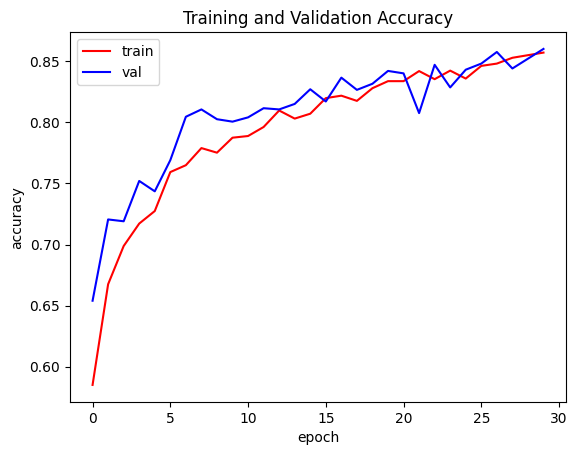

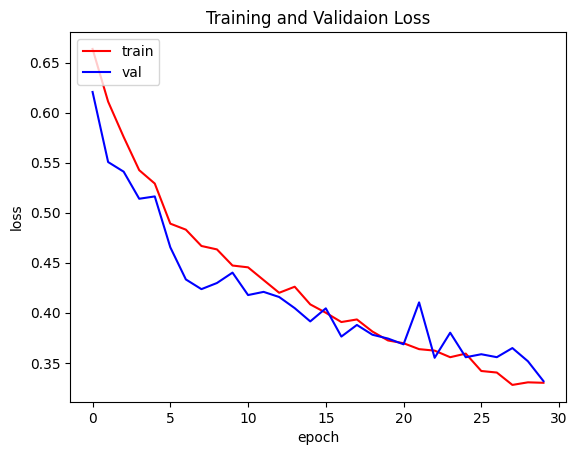

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

Saving dog.4001.jpg to dog.4001.jpg
1/1 [==============================] - 0s 36ms/step
dog.4001.jpg
Dog


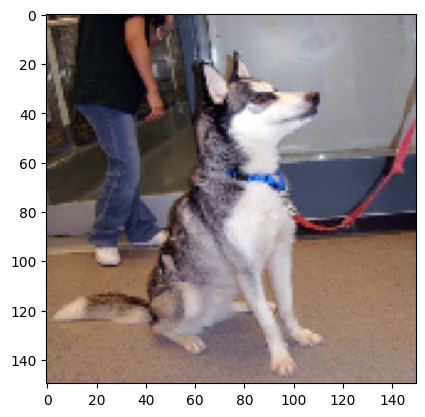

In [19]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)


  print(fn)
  if classes[0,0]!=0:
    print('Dog')
  else:
    print('Cat')

## Konversi Model

In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


In [25]:
converter = tf.lite.TFLiteConverter.from_saved_model("/content/saved_model")
tflite_model = converter.convert()


tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

76140872

In [27]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model saved_model/ tfjs_model/

2024-07-22 09:50:48.792258: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 09:50:48.830214: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 09:50:48.830296: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 09:50:50.765475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Inference (Optional)